# DAA Lab - Practical - 2
## Name : Aman Joharapurkar 
## Roll No : A-32

### Aim :
Aim: 
Construction of Minimum Spanning Tree     
$ Problem Statement: $    A telecommunications organization has offices spanned across multiple
locations around the globe. It has to use leased phone lines for connecting all these offices with
each other. The organization, wants to use minimum cost for connecting all its offices. This
requires that all the offices should be connected using a minimum number of leased lines so as to
reduce the effective cost.                                
A. Consider the following for deciding connections in same state in India:       
i. Find the latitude and longitude of cities in same state. Consider 4 to 6 cities.      
ii. Calculate the cost of connecting each pair of offices by computing the distance between different pair of different cities (as considered in part A) and construct a
fully connected graph.      
iii. Compute a minimum spanning tree using either Prims or Kruskals Method to find the       
cost of connecting offices in different cities.              
B. Repeat the above for cities in different states.    


In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

## Prims Algorithm

In [13]:
def first_step(m):
    row = -1
    col = -1
    min_element = 9999999
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            if m[i][j] < min_element :
                row = i
                col = j
                min_element = m[i][j]
    return row, col    

In [14]:
def prims(m):
    ttf = []
    near = []
    k, l = first_step(m)
    mincost = m[k][l]
    t1 = [k, l, m[k][l]]
    ttf.append(t1)
    for i in range(0, len(m)):
        if i == k or i == l :
            near.append(99)
        elif m[i][k] < m[i][l] :
            near.append(k)
        elif m[i][k] > m[i][l] :
            near.append(l)
    print("Near Array : ")
    print(near)
    index = -1
   
    for i in range(1, len(m) - 1):
        min_elem = 99999999
       
        for j in range(0, len(near)):
            if near[j] != 99 :
                if m[j][near[j]] < min_elem :
                    min_elem = m[j][near[j]]
                    index = j
       
        t1 = [index, near[index], m[index][near[index]]]
        mincost = mincost + m[index][near[index]]
        near[index] = 99
        ttf.append(t1)

        for k in range(0, len(m)):
            if (near[k] != 99 and m[k][near[k]] > m[k][index]) :
                near[k] = index
        print(near)
    print("TTF")
    for i in range(0, len(ttf)) :
        print(ttf[i])
    print(f"Total Minimum Distance is: {round(mincost, 2)}")

In [56]:
time_outside_state = []
time_within_state = []

## Taking 6 cities in India
### Nagpur
### Mumbai
### Delhi
### Ahemdabad
### Amritsar
### Bangalore

## Finding Latitudes and Longitudes of each city using geopy library

In [5]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 970.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------------- -------------------------- 41.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 1.8 MB/s eta 0:00:00


In [2]:
from geopy.geocoders import Nominatim

In [3]:
# For Nagpur
geolocator = Nominatim(user_agent="Distance-Calculator")
location = geolocator.geocode("Nagpur")
print((location.latitude, location.longitude))

(21.1498134, 79.0820556)


In [4]:
# For Mumbai
geolocator = Nominatim(user_agent="Distance-Calculator")
location = geolocator.geocode("Mumbai")
print((location.latitude, location.longitude))

(19.0785451, 72.878176)


In [5]:
# For Delhi
geolocator = Nominatim(user_agent="Distance-Calculator")
location = geolocator.geocode("Delhi")
print((location.latitude, location.longitude))

(28.6273928, 77.1716954)


In [6]:
# For Ahmedabad
geolocator = Nominatim(user_agent="Distance-Calculator")
location = geolocator.geocode("Ahmedabad")
print((location.latitude, location.longitude))

(23.0216238, 72.5797068)


In [7]:
# For Amritsar
geolocator = Nominatim(user_agent="Distance-Calculator")
location = geolocator.geocode("Amritsar")
print((location.latitude, location.longitude))

(31.6343083, 74.8736788)


## Finding Distances of each city from one another using geopy library

In [8]:
cities = ["Nagpur","Mumbai","Delhi","Ahmedabad","Amritsar","Bengaluru"];
print(cities)

['Nagpur', 'Mumbai', 'Delhi', 'Ahmedabad', 'Amritsar', 'Bengaluru']


In [9]:
geolocator = Nominatim(user_agent="Distance-Calculator")

In [10]:
# Sample Calculation
from geopy.distance import geodesic

Nagpur = (21.1498134, 79.0820556)
Mumbai = (18.9733536, 72.82810491917377)
nm1=geodesic(Nagpur, Mumbai).miles
print(nm1)

433.1425428591388


In [22]:
m = []
for i in range(0,len(cities)):
    a = []
    for j in range(0,len(cities)):
        if(i == j):
            a.append(99);
        else:
            location_1 = geolocator.geocode(cities[i])
            location_2 = geolocator.geocode(cities[j])
            city1 = (location_1.latitude, location_1.longitude)
            city2 = (location_2.latitude, location_2.longitude)
            distance = geodesic(city1, city2).miles
            a.append(round(distance, 2))
            
    m.append(a)

In [23]:
print("Adjacency Matrix is : ")
for i in range(0,len(m)):
    print(m[i])

Adjacency Matrix is : 
[99, 427.5, 528.45, 436.35, 767.3, 570.62]
[427.5, 99, 710.95, 271.96, 873.2, 523.54]
[528.45, 710.95, 99, 480.26, 248.64, 1077.07]
[436.35, 271.96, 480.26, 99, 609.51, 765.24]
[767.3, 873.2, 248.64, 609.51, 99, 1295.42]
[570.62, 523.54, 1077.07, 765.24, 1295.42, 99]


## For 6 different cities all over India

In [57]:
start = time.perf_counter()
prims(m)
end = time.perf_counter()
timetaken = end - start
print("The time required is" ,timetaken)
time_outside_state.append(timetaken)

Near Array : 
[2, 2, 99, 2, 99, 2]
[3, 3, 99, 99, 99, 3]
[1, 99, 99, 99, 99, 1]
[99, 99, 99, 99, 99, 1]
[99, 99, 99, 99, 99, 99]
TTF
[2, 4, 248.64]
[3, 2, 480.26]
[1, 3, 271.96]
[0, 1, 427.5]
[5, 1, 523.54]
Total Minimum Distance is: 1951.9
The time required is 0.0010983999818563461


## For 5 different cities all over India

In [44]:
cities = ["Nagpur","Mumbai","Delhi","Ahmedabad","Amritsar"];
print(cities)

['Nagpur', 'Mumbai', 'Delhi', 'Ahmedabad', 'Amritsar']


In [45]:
m_4 = []
for i in range(0,len(cities)):
    a = []
    for j in range(0,len(cities)):
        if(i == j):
            a.append(99);
        else:
            location_1 = geolocator.geocode(cities[i])
            location_2 = geolocator.geocode(cities[j])
            city1 = (location_1.latitude, location_1.longitude)
            city2 = (location_2.latitude, location_2.longitude)
            distance = geodesic(city1, city2).miles
            a.append(round(distance, 2))
            
    m_4.append(a)

In [46]:
print("Adjacency Matrix is : ")
for i in range(0,len(m_4)):
    print(m_4[i])

Adjacency Matrix is : 
[99, 427.5, 528.45, 436.35, 767.3]
[427.5, 99, 710.95, 271.96, 873.2]
[528.45, 710.95, 99, 480.26, 248.64]
[436.35, 271.96, 480.26, 99, 609.51]
[767.3, 873.2, 248.64, 609.51, 99]


In [58]:
start = time.perf_counter()
prims(m_4)
end = time.perf_counter()
timetaken_4 = end - start
print("The time required is" ,timetaken_4)
time_outside_state.append(timetaken_4)

Near Array : 
[2, 2, 99, 2, 99]
[3, 3, 99, 99, 99]
[1, 99, 99, 99, 99]
[99, 99, 99, 99, 99]
TTF
[2, 4, 248.64]
[3, 2, 480.26]
[1, 3, 271.96]
[0, 1, 427.5]
Total Minimum Distance is: 1428.36
The time required is 0.0005737999454140663


## For 4 different cities all over India

In [48]:
cities = ["Nagpur","Mumbai","Delhi","Ahmedabad"];
print(cities)

['Nagpur', 'Mumbai', 'Delhi', 'Ahmedabad']


In [49]:
m_5 = []
for i in range(0,len(cities)):
    a = []
    for j in range(0,len(cities)):
        if(i == j):
            a.append(99);
        else:
            location_1 = geolocator.geocode(cities[i])
            location_2 = geolocator.geocode(cities[j])
            city1 = (location_1.latitude, location_1.longitude)
            city2 = (location_2.latitude, location_2.longitude)
            distance = geodesic(city1, city2).miles
            a.append(round(distance, 2))
            
    m_5.append(a)

In [50]:
print("Adjacency Matrix is : ")
for i in range(0,len(m_5)):
    print(m_5[i])

Adjacency Matrix is : 
[99, 427.5, 528.45, 436.35]
[427.5, 99, 710.95, 271.96]
[528.45, 710.95, 99, 480.26]
[436.35, 271.96, 480.26, 99]


In [59]:
start = time.perf_counter()
prims(m_5)
end = time.perf_counter()
timetaken_5 = end - start
print("The time required is" ,timetaken_5)
time_outside_state.append(timetaken_5)

Near Array : 
[1, 99, 3, 99]
[99, 99, 3, 99]
[99, 99, 99, 99]
TTF
[1, 3, 271.96]
[0, 1, 427.5]
[2, 3, 480.26]
Total Minimum Distance is: 1179.72
The time required is 0.0006656000041402876


## For 6 different cities in Maharashtra

In [33]:
cities_1 = ["Nagpur","Mumbai","Pune","Nashik","Aurangabad","Yavatmal"]

In [30]:
m_1 = []
for i in range(0,len(cities_1)):
    a = []
    for j in range(0,len(cities_1)):
        if(i == j):
            a.append(99);
        else:
            location_1 = geolocator.geocode(cities_1[i])
            location_2 = geolocator.geocode(cities_1[j])
            city1 = (location_1.latitude, location_1.longitude)
            city2 = (location_2.latitude, location_2.longitude)
            distance = geodesic(city1, city2).miles
            a.append(round(distance, 2))
            
    m_1.append(a)

In [31]:
print("Adjacency Matrix is : ")
for i in range(0,len(m_1)):
    print(m_1[i])

Adjacency Matrix is : 
[99, 427.5, 385.28, 351.63, 257.89, 84.21]
[427.5, 99, 74.55, 87.48, 169.67, 352.01]
[385.28, 74.55, 99, 102.56, 134.56, 304.71]
[351.63, 87.48, 102.56, 99, 101.17, 281.98]
[257.89, 169.67, 134.56, 101.17, 99, 183.26]
[84.21, 352.01, 304.71, 281.98, 183.26, 99]


In [60]:
start = time.perf_counter()
prims(m_1)
end = time.perf_counter()
timetaken_1 = end - start
print("The time required is" ,timetaken_1)
time_within_state.append(timetaken_1)

Near Array : 
[2, 99, 99, 1, 2, 2]
[3, 99, 99, 99, 3, 3]
[4, 99, 99, 99, 99, 4]
[5, 99, 99, 99, 99, 99]
[99, 99, 99, 99, 99, 99]
TTF
[1, 2, 74.55]
[3, 1, 87.48]
[4, 3, 101.17]
[5, 4, 183.26]
[0, 5, 84.21]
Total Minimum Distance is: 530.67
The time required is 0.0003918000147677958


## For 5 different cities within Maharashtra

In [35]:
cities_1 = ["Nagpur","Mumbai","Pune","Nashik","Aurangabad"]

In [36]:
m_2 = []
for i in range(0,len(cities_1)):
    a = []
    for j in range(0,len(cities_1)):
        if(i == j):
            a.append(99);
        else:
            location_1 = geolocator.geocode(cities_1[i])
            location_2 = geolocator.geocode(cities_1[j])
            city1 = (location_1.latitude, location_1.longitude)
            city2 = (location_2.latitude, location_2.longitude)
            distance = geodesic(city1, city2).miles
            a.append(round(distance, 2))
            
    m_2.append(a)

In [37]:
print("Adjacency Matrix is : ")
for i in range(0,len(m_2)):
    print(m_2[i])

Adjacency Matrix is : 
[99, 427.5, 385.28, 351.63, 257.89]
[427.5, 99, 74.55, 87.48, 169.67]
[385.28, 74.55, 99, 102.56, 134.56]
[351.63, 87.48, 102.56, 99, 101.17]
[257.89, 169.67, 134.56, 101.17, 99]


In [61]:
start = time.perf_counter()
prims(m_2)
end = time.perf_counter()
timetaken_2 = end - start
print("The time required is" ,timetaken_2)
time_within_state.append(timetaken_2)

Near Array : 
[2, 99, 99, 1, 2]
[3, 99, 99, 99, 3]
[4, 99, 99, 99, 99]
[99, 99, 99, 99, 99]
TTF
[1, 2, 74.55]
[3, 1, 87.48]
[4, 3, 101.17]
[0, 4, 257.89]
Total Minimum Distance is: 521.09
The time required is 0.0008699999889358878


## For 4 different cities within Maharashtra

In [41]:
cities_1 = ["Nagpur","Mumbai","Pune","Nashik"]

In [42]:
m_3 = []
for i in range(0,len(cities_1)):
    a = []
    for j in range(0,len(cities_1)):
        if(i == j):
            a.append(99);
        else:
            location_1 = geolocator.geocode(cities_1[i])
            location_2 = geolocator.geocode(cities_1[j])
            city1 = (location_1.latitude, location_1.longitude)
            city2 = (location_2.latitude, location_2.longitude)
            distance = geodesic(city1, city2).miles
            a.append(round(distance, 2))
            
    m_3.append(a)

In [62]:
start = time.perf_counter()
prims(m_3)
end = time.perf_counter()
timetaken_3 = end - start
print("The time required is" ,timetaken_3)
time_within_state.append(timetaken_3)

Near Array : 
[2, 99, 99, 1]
[3, 99, 99, 99]
[99, 99, 99, 99]
TTF
[1, 2, 74.55]
[3, 1, 87.48]
[0, 3, 351.63]
Total Minimum Distance is: 513.66
The time required is 0.00044190004700794816


In [63]:
print(time_within_state)

[0.0003918000147677958, 0.0008699999889358878, 0.00044190004700794816]


In [64]:
print(time_outside_state)

[0.0010983999818563461, 0.0005737999454140663, 0.0006656000041402876]


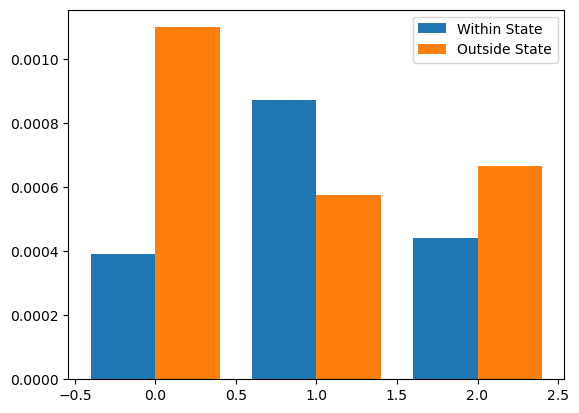

In [66]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(["4", "5", "6"])
tw = np.array(time_within_state)
to = np.array(time_outside_state)
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, tw, 0.4, label='Within State')
plt.bar(X_axis + 0.2, to, 0.4, label='Outside State')
plt.legend()
plt.show()